<a href="https://www.kaggle.com/code/sjagkoo7/numpy-pandas-matplotlib-seaborn?scriptVersionId=285863950" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pytest
from typing import List

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import logging

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/visualization/synthetic_data.csv
/kaggle/input/visualization/tips.csv


In [2]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
# ---- Console Handler ----
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)
console_format = logging.Formatter(
    "%(asctime)s | %(levelname)s | %(name)s | %(message)s"
)
console_handler.setFormatter(console_format)
logger.addHandler(console_handler)
logger.propgate = False

# Numpy +  Pandas

In [3]:
#help(np.array)
#help(np.arange)

In [4]:
def numpy_explore_part1():
    '''
    NumPy was created in 2005 by Travis Oliphant. NumPy aims to provide an array object that is up to 50x faster than traditional Python lists. 
    NumPy arrays are stored at one continuous place in memory unlike lists, so processes can access and manipulate them very efficiently.
    This behavior is called locality of reference in computer science. It also has functions for working in domain of linear algebra, fourier transform, and matrices.")
    '''
    print("Welcome to Numpy Learning .......!")
    print(f"numpy version : {np.__version__}")
    
    # ---------------------- np.array --------------------------------
    print("\n---------------- np.array using list -------------------")
    numpy_list = np.array([1,2,3,4,5]) 
    print(f"numpy array using list : {numpy_list}")
    print(f"numpy_list  type : {type(numpy_list)}")
    print(f"numpy_list  dimension : {numpy_list.ndim}")

    print("\n---------------- np.array using tuple -------------------")
    numpy_tuple = np.array((1,2,3,4,5),dtype = float)
    print(f"numpy array using tuple : {numpy_tuple}")
    print(f"numpy_tuple  type : {type(numpy_tuple)}")
    print(f"numpy_tuple  dimension : {numpy_tuple.ndim}")
    
    print("\n---------------- 2-D array -------------------")
    two_D_array = np.array([[1,2,3,4],[5,6,7,8]])
    print(f"2-D numpy array : \n {two_D_array}")
    print(f"2-D numpy array  dimension : {two_D_array.ndim}")

    print("\n---------------- 3-D array -------------------")
    three_D_array =np.array([[[1,2,3,4],[5,6,7,8]] ,[[9,0,11,12],[14,15,16,17]]])
    print(f"3-D numpy array : \n {three_D_array}")
    
    print("\n---------------- Understading Indexing -------------------")
    print(f"Element on the 2nd row, 4th column in two_D_array : {two_D_array[1,3]}")
    print(f"Access the third element of the second array of the first array:{three_D_array[0,1,2]}")
    print(f"sum of {numpy_list[1]} , {numpy_tuple[2]} and {two_D_array[0][3]}  : {numpy_list[1]+ numpy_tuple[2]+two_D_array[0][3]}")
    

    print("\n------------- Slicing [start:end:step] ----------------------------")
    print(f"accessing element from last : {numpy_list[::-1]}")
    print(f"Slicing with step 2 Original : {numpy_list} Post slicing : {numpy_list[1:4:2]}")
    print(f"2-D slicing :\n{ two_D_array[0:2, 1:3]}")
    
    arr = np.array([[1,2,3,4],[8,9,10,11],[2,3,4,5],[11,12,13,14]])
    print(f"jumping by step 2 for row :\n{arr[:3:2,0:1]}")
    print(f"jumping by step 2 for row and column :\narr{arr[:3:2,0:3:2]}")
    print(f"accessing element in reverse in 2-D numpy array:\n{arr[-1:,:]}")

    print("\n------------------- Broadcasting -----------------------------")
    array_broad1 = np.array([[1,2,3,4],[5,6,7,8],[10,11,12,13],[21,22,23,23]])
    array_broad2 = np.array([[1],[2],[3],[4]])
    result = array_broad1*array_broad2
    print(f"Broadcasting {array_broad1.shape} and {array_broad2.shape} :\n {result}")
    
    return None

#program execution starts from here
if __name__ ==  "__main__":
    numpy_explore_part1()

Welcome to Numpy Learning .......!
numpy version : 1.26.4

---------------- np.array using list -------------------
numpy array using list : [1 2 3 4 5]
numpy_list  type : <class 'numpy.ndarray'>
numpy_list  dimension : 1

---------------- np.array using tuple -------------------
numpy array using tuple : [1. 2. 3. 4. 5.]
numpy_tuple  type : <class 'numpy.ndarray'>
numpy_tuple  dimension : 1

---------------- 2-D array -------------------
2-D numpy array : 
 [[1 2 3 4]
 [5 6 7 8]]
2-D numpy array  dimension : 2

---------------- 3-D array -------------------
3-D numpy array : 
 [[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 9  0 11 12]
  [14 15 16 17]]]

---------------- Understading Indexing -------------------
Element on the 2nd row, 4th column in two_D_array : 8
Access the third element of the second array of the first array:7
sum of 2 , 3.0 and 4  : 9.0

------------- Slicing [start:end:step] ----------------------------
accessing element from last : [5 4 3 2 1]
Slicing with step 2 Original

In [5]:
def numpy_explore_part2():
    '''
    copy vs view : copy refer as new object , any change in copied numpy won't effect on original numpy array. 
    However, view will affect the original numpy.
    '''
    numpy_array = np.array([1,2,3,4],dtype = float)
    view_numpy_array = numpy_array.view()
    view_numpy_array[1] = 20
    print(f'original array after view : {numpy_array} and view array : {view_numpy_array}')

    '''
    shape vs reshape : shape to check the dimension where reshpae is reshape the numpy array.
    '''
    shape_numpy = np.array ([1,2,3,4,5],dtype  = float , ndmin=5)
    print(f"\ncreating 5-D numpy array: {shape_numpy} and dimension of array :{shape_numpy.shape}")
    shape_numpy_1 = np.array ([1,2,3,4],dtype  = float , ndmin=5)
    print(f"creating 5-D numpy array: {shape_numpy_1} and dimension of array :{shape_numpy_1.shape}")
    
    try :
        single_array = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
        print(f"convert 1-D numpy array in 2-D numpy array :\n{single_array.reshape(3,4)}")
        print(f"connvert 1-D numpy array to 3-D numpy array:\n{single_array.reshape(2,3,2)}")
        print(f"convert 1-D numpy array in 2-D numpy array shape is wrong :\n{single_array.reshape(3,5)}")
        #print(f"convert 1-D numpy array in 2-D numpy array :\n{single_array.reshape(3,a)}")
    except ValueError: 
        print("There is error in reshape please check ")
    except Exception as e:
        print(e)

    '''Creating Identity Matrix'''
    print(f"\nCreating 3x3 identity Matrix :\n{np.eye(3)}")

    '''np.arange([start,] stop[, step], dtype=None)'''
    print("\n------------- np.arange([start,] stop[, step], dtype=None) ----------------------------")
    array1 = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
    array2 = np.array([0,2,0,1]) # this will serve as column index
    array3 = array1[np.arange(4),array2]
    print(array3)
    array1[np.arange(4),array2]+=10
    print(array1)
    
    return None


if __name__ =="__main__":
    numpy_explore_part2()

original array after view : [ 1. 20.  3.  4.] and view array : [ 1. 20.  3.  4.]

creating 5-D numpy array: [[[[[1. 2. 3. 4. 5.]]]]] and dimension of array :(1, 1, 1, 1, 5)
creating 5-D numpy array: [[[[[1. 2. 3. 4.]]]]] and dimension of array :(1, 1, 1, 1, 4)
convert 1-D numpy array in 2-D numpy array :
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
connvert 1-D numpy array to 3-D numpy array:
[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]]
There is error in reshape please check 

Creating 3x3 identity Matrix :
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

------------- np.arange([start,] stop[, step], dtype=None) ----------------------------
[ 1  7  9 14]
[[11  2  3  4]
 [ 5  6 17  8]
 [19 10 11 12]
 [13 24 15 16]]


In [6]:
# -------------------- The Outlier Cleaner --------------------
def clean_outliers(array: np.ndarray) -> np.ndarray:
    
    ''' Function Name: clean outliers(array: np.ndarray) -> np.ndarray
        Description:
        You are given a 1D NumPy array of integers or floats. Replace all outliers (values that are more than 2
        standard deviations away from the mean) with the median of the array. Return the cleaned NumPy array
        after replacement.
        Input:
        • array: a 1D NumPy array of integers or floats
        Output:
        • A NumPy array representing the cleaned version of the input
        Example:
        Input:
        array = np.array([50, 60, 250, 55, 70, 5])
        Output:
        array([50, 60, 70, 55, 70, 55]) , output of third index may not be 70''' 
    
    # Calculate mean, standard deviation, and median
    mean = round(np.mean(array),2)
    std = round(np.std(array),2)
    median = round(np.median(array),2)
    print(f"for debugging mean : {mean}, std : {std} and meadian : {median} ")
    
    # Create a copy of the array to avoid modifying the original
    cleaned_array = array.copy()
    
    # Find outliers (values more than 2 standard deviations from mean) and replace them with the median
    lower_bound = round(mean - 2 * std,2)
    upper_bound = round(mean + 2 * std,2)
    print(f"for debugging lower bound : {lower_bound} and upper_bound : {upper_bound}")
    #approach 1 :
    # new_list = [i if i<upper_bound else median for i in array ]
    # return np.array(new_list,dtype = int)
    
    #approach 2 : using boolean index approach
    outlier_element = (cleaned_array < lower_bound) | (cleaned_array > upper_bound)
    cleaned_array[outlier_element]= median
    print(f"debugging boolean index approach :{outlier_element}\n")
    return cleaned_array
    

if __name__ =="__main__":
    array = np.array([50, 60, 250, 55, 70, 5]) 
    print(clean_outliers(array))

for debugging mean : 81.67, std : 78.03 and meadian : 57.5 
for debugging lower bound : -74.39 and upper_bound : 237.73
debugging boolean index approach :[False False  True False False False]

[50 60 57 55 70  5]


In [7]:
def normalize_image(image: np.ndarray) -> float:
    '''The Image Normalizer
    Function Name: normalize image(image: np.ndarray) -> float
    
    Description:
    Given a 16×16 NumPy array of random integers between 0 and 255, normalize each non-overlapping
    4×4 block by subtracting its block mean. After normalization, compute and return the overall standard
    deviation of the entire normalized array.
    
    Clarification:
    Each 4×4 block is treated independently. Within each block:
    normalized block = block − mean(block)
    
    After performing this operation for all blocks, you have one combined 16×16 array of normalized values.
    Then compute the standard deviation of all 256 normalized values together.
    
    Worked Example:
    Block =
    [[10 20 30 40
    15 25 35 45
    20 30 40 50
    25 35 45 55]] ⇒ Mean = 32.5
    
    Subtract the mean:
    [[−22.5 −12.5 −2.5 7.5
    −17.5 −7.5 2.5 12.5
    −12.5 −2.5 7.5 17.5
    −7.5 2.5 12.5 22.5]]
    
    Then compute the standard deviation across the full 16×16 normalized image:
    SD = √( (1 / 256) * Σ (xi²) ),  where i = 1 to 256
    
    Input:
    • image: 2D NumPy array of shape (16, 16)
    Output:
    • A single float — the standard deviation of the final normalized image'''
    #print(f"passed image :\n {image}")
    image = image.astype(float)
    for i in range(0,16,4):
        for j in range(0,16,4):
            # print(image[i:i+4,j:j+4])
            mean_val = np.mean(image[i:i+4,j:j+4])
            image[i:i+4,j:j+4] = image[i:i+4,j:j+4] - mean_val
            #print(image[i:i+4,j:j+4])
        
    return round(np.std(image),3)

if __name__ == "__main__":
    image = np.arange(256).reshape(16,16)
    #image = np.array([[10,20,30,40],[15,25,35,45],[20,30,40,50],[25,35,45,55]])
    #print(image)
    print(normalize_image(image))

17.923


In [8]:
# -------- average pairwise Euclidean distance ----------------------
def pairwise_distance(A: np.ndarray, B: np.ndarray) -> float:
    
    '''
    Compute average pairwise Euclidean distance between points in A and B.
    
    Function Name: pairwise distance(A: np.ndarray, B: np.ndarray) -> float
    
    Description:
    You are given two 2D NumPy arrays, A and B, representing two sets of points in 2D space. Compute
    the Euclidean distance between every pair of points (i,j) where i is from A and j is from B. Each pair
    (i,j) is considered only once — symmetric duplicates are not counted again. Return the average of all
    unique pairwise distances.
    Mathematical Expression:
    d(i,j) =sqrt((A i [0] − B j [0])^2 + (A i [1] − B j [1])^2)
    Then compute the mean over all unique (i,j) pairs.
    Input:
    • A: NumPy array of shape (M, 2)
    • B: NumPy array of shape (N, 2)
    
    Output:
    • A single float — the average of all unique pairwise Euclidean distances
    Example:
    A = np.array([[0, 0], [1, 1]])
    B = np.array([[2, 2], [3, 3]])
    # Distances: sqrt((0-2)ˆ2+(0-2)ˆ2), sqrt((0-3)ˆ2+(0-3)ˆ2),
    # sqrt((1-2)ˆ2+(1-2)ˆ2), sqrt((1-3)ˆ2+(1-3)ˆ2)
    # => [2.828, 4.243, 1.414, 2.828]
    # Average = 2.828
    '''
    dist = []
    for i in A :
        for j in B :
            Euclidean_dist = round(np.linalg.norm(j-i),3)
            dist.append(Euclidean_dist)
    avg_val = round(sum(dist)/(len(dist)),3)
    return avg_val

if __name__== "__main__":
    A = np.array([[0, 0], [1, 1]])
    B = np.array([[2, 2], [3, 3]])
    print(f"Average of pairwsie distance : {pairwise_distance(A,B)}")

Average of pairwsie distance : 2.828


In [9]:
#help(pd.DataFrame)
#a=[1,2,3,4]
# same output
#print(a[:])
#print(a[::])

In [10]:
def pandas_explore_part1():
    '''
    Pandas was created by Wes McKinney in 2008
    '''
    
    print("Welcome to Pandas Learning .......!")
    print(f"pandas version : {pd.__version__}\n")

    # ---------------------- pd.series --------------------------------
    print(f"Pandas Series :\n{pd.Series([3.5,7.2,5.0])}")
    
    print(f"\nPandas Series with custom index:\n{pd.Series([3.5,7.2,5.0],index=['x','y','z'])}")
    
    dic_var = {'Sub1':'Math','sub2':'Python','sub3':'TSA'}
    print(f"\nPandas Series using dictionary :\n{pd.Series(dic_var)}")
    
    print(f"\nPanas Series using custom filter from dictionary :\n{pd.Series(dic_var,index=['Sub1','sub2'])}")

    #----------------------- pd.DataFrame ------------------------------
    student_details = pd.DataFrame({'Name':['Amardeep Kumar','PP Singh','GG Gandhi','TT Singh'],
                 'Course' :['M.TECH AI','P.HD','MBA','B.TECH'],
                 'College':['IIT Madras','IIT Kanpur','IIT Mumbai','IIT Goa'],
                 'Year':['2025','2024','2023','2021'],
                 'Exam Score':[200,300,400,500]},index=['S1','S2','S3','S4'])
    print(f"\nstudent_details dataframe :\n{student_details}")

    #-------loc syntax : df.loc[row_labels, column_labels] -----------------
    person_details = pd.DataFrame({
    "Name": ["Asha", "Bala", "Chetan", "Divya"],
    "Marks": [85, 90, 78, 92],
    "City": ["Chennai", "Pune", "Delhi", "Chennai"]}, index=["s1", "s2", "s3", "s4"])
    
    print(f"\nperson_details dataframe :\n{person_details}")
    
    print(f"\nusing loc :\n{person_details.loc[['s1'],['Name','Marks']]}")
    print(f"\nusing loc with slicing :\n{person_details.loc[:'s3',:]}")
    print(f"\nreversing dataframe using loc:\n{person_details.loc[::-1,::-1]}")
    #print(person_details.loc[[:],[:]]) #gives syntax error
    
    print(f"\napplying filter using loc :\n{person_details.loc[person_details['Marks']>80,['Name','Marks']]}")
    print(f"\n using loc with conidtions :\n{person_details.loc[(person_details['Marks']>80) & (person_details['City'] =='Chennai') ,['Name','Marks','City']]}")
            # applying multiple connditions(lambda) using loc
    Result = person_details.loc[lambda x:(x['Marks']>85) & (x['City']=='Chennai'),['Name','Marks']]
    print(f"\napplying multiple connditions(lambda) using loc:\n {Result}")

    #------- iloc syntax : df.iloc[row_positions, column_positions] ----------------
    print(f"\n Workig with iloc:\n{person_details.iloc[:2,:2]}")

    #-------  query syntax : df.query()--------------------------------------------
    cutoff = 90
    print('Working with query:')
    print(person_details.query('Marks == @cutoff')[['Name','Marks']])
    #help(person_details.query)
    
    return None

if __name__ == "__main__":
    pandas_explore_part1()

Welcome to Pandas Learning .......!
pandas version : 2.2.3

Pandas Series :
0    3.5
1    7.2
2    5.0
dtype: float64

Pandas Series with custom index:
x    3.5
y    7.2
z    5.0
dtype: float64

Pandas Series using dictionary :
Sub1      Math
sub2    Python
sub3       TSA
dtype: object

Panas Series using custom filter from dictionary :
Sub1      Math
sub2    Python
dtype: object

student_details dataframe :
              Name     Course     College  Year  Exam Score
S1  Amardeep Kumar  M.TECH AI  IIT Madras  2025         200
S2        PP Singh       P.HD  IIT Kanpur  2024         300
S3       GG Gandhi        MBA  IIT Mumbai  2023         400
S4        TT Singh     B.TECH     IIT Goa  2021         500

person_details dataframe :
      Name  Marks     City
s1    Asha     85  Chennai
s2    Bala     90     Pune
s3  Chetan     78    Delhi
s4   Divya     92  Chennai

using loc :
    Name  Marks
s1  Asha     85

using loc with slicing :
      Name  Marks     City
s1    Asha     85  Chennai


In [11]:
def pandas_explore_part2():
    student_score = pd.DataFrame({
    "Name": ["Asha", "Bala", "Chetan", "Divya", "Jay"],
    "Marks": [85, 40, 78, 92, 53],
    "City": ["Chennai", "Pune", "Delhi", "Vizag", "Mumbai"]
    })
    student_score.loc[student_score['City']=='Delhi','Marks'] = 80
    print(f"broadcasting ... :\n{student_score}")

    student_score.loc[student_score['Marks']<60,'Marks']+=5
    print(f"broadcasting increasing marks ... :\n{student_score}")

    student_score.loc[lambda x: x['Marks']>90,'Marks'] -=10
    print(f"broadcasting decreasing marks ... :\n{student_score}")

    #------------------------------apply()------------------------------
    student_score['Grade'] = student_score['Marks'].apply(lambda x : "A" if x>85 else ("B" if x>75 else "C"))
    print(f"Broadcasting in Pandas Adding new columns :\n{student_score}")
    
    return None

if __name__ =="__main__":
    pandas_explore_part2()

broadcasting ... :
     Name  Marks     City
0    Asha     85  Chennai
1    Bala     40     Pune
2  Chetan     80    Delhi
3   Divya     92    Vizag
4     Jay     53   Mumbai
broadcasting increasing marks ... :
     Name  Marks     City
0    Asha     85  Chennai
1    Bala     45     Pune
2  Chetan     80    Delhi
3   Divya     92    Vizag
4     Jay     58   Mumbai
broadcasting decreasing marks ... :
     Name  Marks     City
0    Asha     85  Chennai
1    Bala     45     Pune
2  Chetan     80    Delhi
3   Divya     82    Vizag
4     Jay     58   Mumbai
Broadcasting in Pandas Adding new columns :
     Name  Marks     City Grade
0    Asha     85  Chennai     B
1    Bala     45     Pune     C
2  Chetan     80    Delhi     B
3   Divya     82    Vizag     B
4     Jay     58   Mumbai     C


In [12]:
'''Use the following DataFrame as an example to understand the schema for upcoming questions. The actual DataFrame used during testing will have the same structure.'''

data = {
    'OrderID': [101, 102, 103, 104, 105, 106, 107, 108],
    'OrderDate': ['2025-10-01', '2025-10-01', '2025-10-02',
                  '2025-10-02', '2025-10-03', '2025-10-04',
                  '2025-10-04', '2025-10-05'],
    'Product': ['Laptop', 'Mouse', 'Keyboard', 'Laptop', 'Monitor',
                'Mouse', 'Webcam', 'Keyboard'],
    'Category': ['Electronics', 'Peripherals', 'Peripherals',
                 'Electronics', 'Electronics', 'Peripherals',
                 'Peripherals', 'Peripherals'],
    'Price': [1200, 25, 75, 1250, 300, 30, 50, 80],
    'Quantity': [2, 5, 3, 1, 2, 4, 1, 2]
}

df = pd.DataFrame(data)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
print(df.head())
print(df.columns)

   OrderID  OrderDate   Product     Category  Price  Quantity
0      101 2025-10-01    Laptop  Electronics   1200         2
1      102 2025-10-01     Mouse  Peripherals     25         5
2      103 2025-10-02  Keyboard  Peripherals     75         3
3      104 2025-10-02    Laptop  Electronics   1250         1
4      105 2025-10-03   Monitor  Electronics    300         2
Index(['OrderID', 'OrderDate', 'Product', 'Category', 'Price', 'Quantity'], dtype='object')


In [13]:
df_experiment = df.copy()
df_experiment['Revenue'] = df_experiment['Price']*df_experiment['Quantity']
df_experiment

,OrderID,OrderDate,Product,Category,Price,Quantity,Revenue
0,101,2025-10-01,Laptop,Electronics,1200,2,2400
1,102,2025-10-01,Mouse,Peripherals,25,5,125
2,103,2025-10-02,Keyboard,Peripherals,75,3,225
3,104,2025-10-02,Laptop,Electronics,1250,1,1250
4,105,2025-10-03,Monitor,Electronics,300,2,600
5,106,2025-10-04,Mouse,Peripherals,30,4,120
6,107,2025-10-04,Webcam,Peripherals,50,1,50
7,108,2025-10-05,Keyboard,Peripherals,80,2,160


In [14]:
try :
    print(df_experiment.groupby('OrderDate').agg({'Revenue':['min','max','mean'],'Product':['max']}))
except Exception as e:
    print(e)

           Revenue                 Product
               min   max    mean       max
OrderDate                                 
2025-10-01     125  2400  1262.5     Mouse
2025-10-02     225  1250   737.5    Laptop
2025-10-03     600   600   600.0   Monitor
2025-10-04      50   120    85.0    Webcam
2025-10-05     160   160   160.0  Keyboard


In [15]:
# -------------------- The Daily Top Product ----------------------
def get_daily_top_product(df: pd.DataFrame) -> list:
    ''' Function Name: get daily top product(df: pd.DataFrame) -> list
    Description:
    For each unique OrderDate, find the product that generated the highest total revenue (Price ×
    3
    Quantity). Return a list of product names corresponding to each unique date, ordered by ascending
    OrderDate.
    
    Input:
    • df: DataFrame containing atleast thecolumns OrderDate, Product, Price, andQuantity.
    The OrderDate column should be of datetime dtype (or parseable to datetime).
    
    Output:
    • List[str]: Product names — one per unique date (dates in ascending order).
    
    Notes / Tie-breaking:
    If two products on the same date have exactly the same total revenue, the tie is broken deterministically
    by choosing the product that appears first after sorting by revenue descending and then by product name
    ascending.'''
    
    df1 = df.copy()
    df1['Revenue'] = df['Price']*df['Quantity']
    print(f"Upadted Data Frame with Revenue Column :\n {df1}")
    print(f"\nlist of columns :{list(df1.columns)}")
    
    idx = df1.groupby('OrderDate')['Revenue'].idxmax()
    top_product = df1.loc[idx,['Product']]
    
    top_product = list(top_product['Product'])
    return top_product
    
if __name__ == "__main__":
    print(get_daily_top_product(df))

Upadted Data Frame with Revenue Column :
    OrderID  OrderDate   Product     Category  Price  Quantity  Revenue
0      101 2025-10-01    Laptop  Electronics   1200         2     2400
1      102 2025-10-01     Mouse  Peripherals     25         5      125
2      103 2025-10-02  Keyboard  Peripherals     75         3      225
3      104 2025-10-02    Laptop  Electronics   1250         1     1250
4      105 2025-10-03   Monitor  Electronics    300         2      600
5      106 2025-10-04     Mouse  Peripherals     30         4      120
6      107 2025-10-04    Webcam  Peripherals     50         1       50
7      108 2025-10-05  Keyboard  Peripherals     80         2      160

list of columns :['OrderID', 'OrderDate', 'Product', 'Category', 'Price', 'Quantity', 'Revenue']
['Laptop', 'Laptop', 'Monitor', 'Mouse', 'Keyboard']


In [16]:
'''Use the following DataFrame as an example to understand the schema for upcoming questions. The actual DataFrame used during testing will have the same structure.'''
data = {
    'OrderID': [101, 101, 103, 104, 105, 105, 107, 108],
    'OrderDate': ['2025-10-01', '2025-10-01', '2025-10-02',
                  '2025-10-02', '2025-10-03', '2025-10-04',
                  '2025-10-04', '2025-10-05'],
    'Product': ['Monitor', 'Mouse', 'Keyboard', 'Laptop', 'Monitor',
                'Mouse', 'Webcam', 'Keyboard'],
    'Category': ['Electronics', 'Peripherals', 'Peripherals',
                 'Electronics', 'Electronics', 'Peripherals',
                 'Peripherals', 'Peripherals'],
    'Price': [1200, 25, 75, 1250, 300, 30, 50, 80],
    'Quantity': [2, 5, 3, 1, 2, 4, 1, 2]
}

df_frequent_product_pair = pd.DataFrame(data)
df_frequent_product_pair['OrderDate'] = pd.to_datetime(df_frequent_product_pair['OrderDate'])
print(f"Data : {df_frequent_product_pair.head()}")
print("\nData info:\n")
print(df_frequent_product_pair.info())
print(f"\nData Statistics :\n{df_frequent_product_pair.describe()}")

Data :    OrderID  OrderDate   Product     Category  Price  Quantity
0      101 2025-10-01   Monitor  Electronics   1200         2
1      101 2025-10-01     Mouse  Peripherals     25         5
2      103 2025-10-02  Keyboard  Peripherals     75         3
3      104 2025-10-02    Laptop  Electronics   1250         1
4      105 2025-10-03   Monitor  Electronics    300         2

Data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderID    8 non-null      int64         
 1   OrderDate  8 non-null      datetime64[ns]
 2   Product    8 non-null      object        
 3   Category   8 non-null      object        
 4   Price      8 non-null      int64         
 5   Quantity   8 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 516.0+ bytes
None

Data Statistics :
         OrderID            OrderD

In [17]:
# ---------------------  The Product Relationship Puzzle ------------------------
def frequent_product_pair(df: pd.DataFrame) -> tuple:
    
    '''Function Name: strongest product pair(df: pd.DataFrame) -> tuple
    
    Description:
    Find the pair of products that are most frequently bought together, i.e., appear in the same OrderID.
    Each unique order can contain multiple products, and you must identify the two products that co-occur
    most often across all orders.
    Return the names of the two products as a tuple (product1, product2). The pair should be
    ordered alphabetically, i.e., product1 < product2.
    
    Input:
    • df: Pandas DataFrame with columns OrderID,Product, Category, Price, and Quantity.
    
    Output:
    • Tuple[str, str] — the names of the two products most frequently co-purchased.
    
    Notes:
    • Each OrderID can have one or more products.
    • You should only consider pairs of distinct products.
    • If two pairs have the same frequency, choose the pair that is lexicographically smallest (alphabet-
    ical order). '''
    df_boolean = df.groupby('OrderID')['Product'].count()>=2
    df_series = pd.Series(df_boolean)
    df_grouped = df[df['OrderID'].map(df_series)]
    print(f"DataFrame with only more than one product:\n{df_grouped}")
    df_grouped_product = df_grouped.groupby('Product')['Product'].count().sort_values(ascending=False)
    lst = list(df_grouped_product.index)
    lst.sort()
    return tuple(lst[:2])


if __name__ == "__main__":
    df1 = df_frequent_product_pair.copy()
    if 'OrderDate' in list(df_frequent_product_pair.columns):
        df1 = df1.drop('OrderDate',axis=1)
    else :
        pass
    #print(df1)
    print(frequent_product_pair(df1))

DataFrame with only more than one product:
   OrderID  Product     Category  Price  Quantity
0      101  Monitor  Electronics   1200         2
1      101    Mouse  Peripherals     25         5
4      105  Monitor  Electronics    300         2
5      105    Mouse  Peripherals     30         4
('Monitor', 'Mouse')


In [18]:
'''Use the following DataFrame as an example to understand the schema for upcoming questions. The actual DataFrame used during testing will have the same structure.'''
data = {
    'OrderID': [101, 102, 103, 104, 105, 106, 107, 108],
    'OrderDate': ['2025-10-01', '2025-10-01', '2025-10-02',
                  '2025-10-02', '2025-10-03', '2025-10-04',
                  '2025-10-04', '2025-10-05'],
    'Product': ['Laptop', 'Mouse', 'Keyboard', 'Laptop', 'Monitor',
                'Mouse', 'Webcam', 'Keyboard'],
    'Category': ['Electronics', 'Peripherals', 'Peripherals',
                 'Electronics', 'Electronics', 'Peripherals',
                 'Peripherals', 'Peripherals'],
    'Price': [1200, 25, 75, 1250, 300, 30, 50, 80],
    'Quantity': [2, 5, 3, 1, 2, 4, 1, 2]
}

df_most_frequent_leader = pd.DataFrame(data)
df_most_frequent_leader['OrderDate'] = pd.to_datetime(df_most_frequent_leader['OrderDate'])
print(f"Data :\n {df_most_frequent_leader.head()}")
print("\nData info:\n")
print(df_most_frequent_leader.info())
print(f"\nData Statistics :\n{df_most_frequent_leader.describe()}")

Data :
    OrderID  OrderDate   Product     Category  Price  Quantity
0      101 2025-10-01    Laptop  Electronics   1200         2
1      102 2025-10-01     Mouse  Peripherals     25         5
2      103 2025-10-02  Keyboard  Peripherals     75         3
3      104 2025-10-02    Laptop  Electronics   1250         1
4      105 2025-10-03   Monitor  Electronics    300         2

Data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderID    8 non-null      int64         
 1   OrderDate  8 non-null      datetime64[ns]
 2   Product    8 non-null      object        
 3   Category   8 non-null      object        
 4   Price      8 non-null      int64         
 5   Quantity   8 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 516.0+ bytes
None

Data Statistics :
         OrderID            Order

In [19]:
# -----------------------  The Dominant Category Challenge ----------------------
def most_frequent_leader(df: pd.DataFrame) -> str:
    
    '''Function name: most frequent leader(df: pd.DataFrame) -> str
    
    Use the following DataFrame as an example to understand the schema for this question. The actual
    DataFrame used during testing will have the same structure.

    data = {
    ’OrderID’: [101, 102, 103, 104, 105, 106, 107, 108],
    ’OrderDate’: [’2025-10-01’, ’2025-10-01’, ’2025-10-02’,
    ’2025-10-02’, ’2025-10-03’, ’2025-10-04’,
    ’2025-10-04’, ’2025-10-05’],
    ’Product’: [’Laptop’, ’Mouse’, ’Keyboard’, ’Laptop’, ’Monitor’,
    ’Mouse’, ’Webcam’, ’Keyboard’],
    ’Category’: [’Electronics’, ’Peripherals’, ’Peripherals’,
    ’Electronics’, ’Electronics’, ’Peripherals’,
    ’Peripherals’, ’Peripherals’],
    ’Price’: [1200, 25, 75, 1250, 300, 30, 50, 80],
    ’Quantity’: [2, 5, 3, 1, 2, 4, 1, 2]
    }
    
    For each date, compute cumulative revenue for each category up to that date. Then determine which
    category leads (i.e., has the highest cumulative revenue) most frequently across all dates. Return the
    category name as a string.
    
    Input:
    • df: Pandas DataFrame with columns OrderDate, Category, Price, and Quantity.
    Output: String — most frequent leader in cumulative revenue.'''

    df['Revenue'] = df['Price']*df['Quantity']
    df = df[['OrderDate','Category','Revenue']]
    df_grouped = df.groupby(['OrderDate','Category'])['Revenue'].sum().reset_index()
    df_grouped['Cummulative Revenue'] = df_grouped.groupby('Category')['Revenue'].cumsum()
    df_grouped = df_grouped.loc[df_grouped.groupby('Category')['Cummulative Revenue'].idxmax()]
    df_grouped = df_grouped.sort_values('Cummulative Revenue',ascending = False)
    return  df_grouped.iloc[0,1]

if __name__ == "__main__":
    df1 = df_most_frequent_leader.copy()
    if 'OrderDate' in list(df_most_frequent_leader.columns):
        df1 = df1.drop(['OrderID','Product'],axis=1)
    else :
        pass
    #print(df1)
    print(most_frequent_leader(df1))

Electronics


In [20]:
# ----------------------------------- The Sales Simulation -----------------------
def simulate_sales(sales_df: pd.DataFrame, days: int = 30) -> list :
    '''Functionname: simulate sales(sales df: pd.DataFrame, days: int = 30) ->
    list
    Simulate sales data for the next days (default = 30).
    For each day, generate:
    • A price = last known price + random noise from Normal(0, 5)
    • A quantity = random integer between 1 and 5
    
    Return a list of tuples, where each tuple represents one simulated sale: (price, quantity) for
    each simulated day.
    
    Input:
    • sales df: Pandas DataFrame with columns OrderDate, Product, Price.
    • days: integer (default 30) — number of simulated days.
    
    Output: List of tuples: [(price1, qty1), (price2, qty2), ...] of length days.'''
    if sales_df.empty:
        return []
    df_sorted = sales_df.sort_values('OrderDate')
    current_price = df_sorted['Price'].iloc[-1]
    current_price = float(current_price)
    simulated_sales=[]
    for _ in range(days):
        simulated_price = round(current_price + np.random.normal(0,5),2)
        simulated_quantity = np.random.randint(1,6)
        simulated_sales.append((simulated_price, simulated_quantity))
        current_price = simulated_price
    return simulated_sales

np.random.seed(0)
if __name__ == "__main__" :
    data = {
    'OrderID': [101, 102, 103],
    'OrderDate': ['2025-10-01', '2025-10-02', '2025-10-03'],
    'Price': [100, 105, 110]}
    df = pd.DataFrame(data)
    #print(df)
    print(simulate_sales(df,30))

[(118.82, 4), (120.82, 4), (109.48, 3), (116.15, 5), (114.69, 5), (114.02, 3), (120.85, 1), (120.36, 2), (122.78, 1), (125.68, 3), (132.75, 4), (132.13, 4), (133.7, 2), (129.43, 2), (129.6, 5), (133.0, 4), (135.96, 5), (132.05, 3), (130.06, 1), (125.92, 5), (129.99, 3), (128.84, 3), (132.92, 2), (134.07, 2), (140.22, 3), (146.23, 4), (149.3, 5), (156.45, 2), (157.0, 5), (155.1, 5)]


In [21]:
# ---------------------- The Weighted Moving Average (WMA) --------------------
def weighted_moving_average(df: pd.DataFrame, weights: np.ndarray) -> list:

    '''Functionname: weighted moving average(df: pd.DataFrame, weights: np.ndarray) -> list:
    
    Compute the Weighted Moving Average (WMA) of total daily revenues per category across all days.
    
    The WMA assigns more weight to recent days (e.g., with weights [0.5, 0.3, 0.2], the latest day gets 0.5).
    Return a list containing the WMA value for each day. For the first few days (where there are fewer
    than the required number of previous days), compute the WMA using the available subset of weights
    (normalize them so they still sum to 1).
    
    Input:
    • df: PandasDataFramewithcolumns[’OrderDate’, ’Category’, ’Price’, ’Quantity’].
    • weights: list or NumPy array of weights (most recent day has the first weight).
    
    Output: List of floats — one WMA value per day.'''
    
    df['Revenue'] = df['Price'] * df['Quantity']
    df_grouped = df.groupby('OrderDate')['Revenue'].sum().reset_index()
    df_grouped = df_grouped.sort_values('OrderDate')
    revenue = df_grouped['Revenue'].values
    weights = np.array(weights)
    
    weight_move_avg = []
    for i in range(len(revenue)):
        step_size = min(i + 1, len(weights))
        revenue_window = revenue[max(0, i - step_size + 1):i + 1]
        weight_sub = weights[:step_size]
        normalized_weights = weight_sub / np.sum(weight_sub)
        revenue_window_reversed = revenue_window[::-1]
        wma = np.sum(revenue_window_reversed * normalized_weights)
        weight_move_avg.append(wma)
    
    return weight_move_avg 


if __name__ == "__main__":
    data1 = {'OrderDate':['2025-10-01'],'Price':[100],'Quantity':[1],'Category':['Electronics']}
    data2 = {'OrderDate':['2025-10-01','2025-10-02'],'Price':[50,70],'Quantity':[2,3],'Category':['A','A']}
    df1 = pd.DataFrame(data1)
    df2 = pd.DataFrame(data2)
    lst = [df1,df2]
    weights = np.array([3])
    # print(df1)
    # print('\n')
    # print(df2)
    for df in lst :
        print(weighted_moving_average(df, weights))

[100.0]
[100.0, 210.0]


In [22]:
#---------------------- The Dynamic Filter Sum ----------------------
def sum_filtered_sales(df, min_sales, exclude_region):
    '''
    Filter the DataFrame to keep rows where Sales are strictly greater
    than min_sales AND Region is NOT equal to exclude_region.
    Return the sum of the Sales column for these filtered rows.
    
    Parameters:
    - df: DataFrame with columns 'Sales' and 'Region'
    - min_sales: (int/float) Threshold for sales
    - exclude_region: (str) Region to exclude
    
    Return Value: Float (Sum of sales)
    '''
    sum_value  = df[(df['Sales'] > min_sales) & (df['Region'] != exclude_region)]['Sales'].sum()
    sum_value = float(sum_value)
    return sum_value

if __name__ == "__main__":
    df_in_1 = pd.DataFrame({'Sales': [100, 600, 700], 'Region': ['North', 'South', 'North']})
    print(f"Sum : {sum_filtered_sales(df_in_1, 500, 'North')}")
    df_in_2 = pd.DataFrame({'Sales': [100, 200], 'Region': ['A', 'B']})
    print(f"Sum : {sum_filtered_sales(df_in_2, 300, 'A')} ")

Sum : 600.0
Sum : 0.0 


In [23]:
%%writefile get_pivot.py
# everything we must after magic command.
#--------------------------- The Pivot Cell Lookup ---------------------------
import pandas as pd
def get_pivot_val(df:pd.DataFrame, date:str, category:str)->float:
    '''
    Create a pivot table where rows are 'Date', columns are 'Category',
    and values are the mean of 'Values'. Fill missing entries with 0.
    Return the specific value at the intersection of the given date and category.
    
    Parameters:
    - df: DataFrame with 'Date', 'Category', 'Values'
    - date: (str) The index label to lookup
    - category: (str) The column label to lookup
    
    Return Value: Float
    '''
    new_df = pd.pivot_table(df,index = 'Date',columns = ['Category'], values = 'Values' , aggfunc = 'mean',fill_value=0)
    #print(new_df)
    try:
        value = new_df.loc[date,category]
        return float(value)
    except :
        return 0.0

# if __name__ == "__main__":
#     df_in1 = pd.DataFrame({'Date': ['D1', 'D1'], 'Category': ['A', 'A'], 'Values': [10, 20]})
#     print(f"Common : {get_pivot_val(df_in1, 'D1', 'A')}") # 15.0
#     df_in2 = pd.DataFrame({'Date': ['D1'], 'Category': ['A'], 'Values': [10]})
#     print(f"Common : {get_pivot_val(df_in2, 'D1', 'A')}") # 10.0

Writing get_pivot.py


In [24]:
%%writefile test_get_pivot_val.py 
# everything we must after magic command.
#file name and test function  must start with 'test_'
import pandas as pd
from get_pivot import get_pivot_val
def test_scenario_1():
    df = pd.DataFrame({'Date': ['D1', 'D1'], 'Category': ['A', 'A'], 'Values': [10, 20]})
    result = get_pivot_val(df, 'D1', 'A')
    assert result == 15.0

def test_scennario_2():
    df = pd.DataFrame({'Date': ['D1'], 'Category': ['A'], 'Values': [10]})
    result = get_pivot_val(df, 'D1', 'A')
    assert result == 10.0

Writing test_get_pivot_val.py


In [25]:
!ls -l

total 120
-rw-r--r-- 1 root root   1237 Dec 13 05:44 get_pivot.py
---------- 1 root root 113290 Dec 13 05:44 __notebook__.ipynb
-rw-r--r-- 1 root root    501 Dec 13 05:44 test_get_pivot_val.py


In [26]:
#!pytest -q # short summary
#!pytest -v # gives details summary but will run all pytest file
!pytest test_get_pivot_val.py -v

============================= test session starts ==============================
platform linux -- Python 3.11.13, pytest-8.4.1, pluggy-1.6.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /kaggle/working
plugins: anyio-4.11.0, typeguard-4.4.4, langsmith-0.4.8
collected 2 items                                                              

test_get_pivot_val.py::test_scenario_1 PASSED                            [ 50%]
test_get_pivot_val.py::test_scennario_2 PASSED                           [100%]

============================== 2 passed in 0.50s ===============================


In [27]:
%%writefile get_dept_avg.py
import pandas as pd 
def get_dept_avg_salary(df, target_dept):
    '''
    Group the data by 'Department'. Calculate and return the mean
    salary for the specific target_dept.
    
    Parameters:
    - df: DataFrame with 'Department', 'Salary'
    - target_dept: (str) The department to query
    
    Return Value: A floating-point number rounded to two decimal places.
    '''
    group_pd = df.groupby('Department')['Salary'].mean().reset_index()
    mean_sal = group_pd[group_pd['Department']==target_dept]['Salary']
    #print(group_pd)
    return round(float(mean_sal),2)

#if __name__ == "__main__":
    # df_in1 = pd.DataFrame({'Department': ['IT', 'IT', 'HR'], 'Salary': [100, 200, 50]})
    # print(f"dept min salary : {get_dept_avg_salary(df_in1, 'IT')}") # 150.0
    # df_in2 = pd.DataFrame({'Department': ['Ops'], 'Salary': [300]})
    # print(f"dept min salary : {get_dept_avg_salary(df_in2, 'Ops')}") #300.0

Writing get_dept_avg.py


In [28]:
%%writefile test_get_dept_avg.py 
#file name and test function  must start with 'test_'
import pandas as pd
import pytest
from get_dept_avg import get_dept_avg_salary

@pytest.fixture
def dataframe1():
    """Fixture for first test dataframe"""
    return(pd.DataFrame({'Department': ['IT', 'IT', 'HR'], 'Salary': [100, 200, 50]}))

def test_scenario_1(dataframe1):
    """Test using fixture"""
    result = get_dept_avg_salary(dataframe1,'IT')
    assert result == 150.0

@pytest.fixture
def dataframe2():
    """Fixture for first test dataframe"""
    return(pd.DataFrame({'Department': ['Ops'], 'Salary': [300]}))

def test_scenario_2(dataframe2):
    """Test using fixture"""
    result = get_dept_avg_salary(dataframe2,'Ops')
    assert result == 300.0

Writing test_get_dept_avg.py


In [29]:
!pytest test_get_dept_avg.py -v

============================= test session starts ==============================
platform linux -- Python 3.11.13, pytest-8.4.1, pluggy-1.6.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /kaggle/working
plugins: anyio-4.11.0, typeguard-4.4.4, langsmith-0.4.8
collected 2 items                                                              

test_get_dept_avg.py::test_scenario_1 PASSED                             [ 50%]
test_get_dept_avg.py::test_scenario_2 PASSED                             [100%]

=============================== warnings summary ===============================
test_get_dept_avg.py::test_scenario_1
test_get_dept_avg.py::test_scenario_2
  /kaggle/working/get_dept_avg.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
    return round(float(mean_sal),2)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
======================== 2 passed, 2 warning

In [30]:
# -------------------------The Unique Month Counter ---------------------------
def count_unique_months(df:pd.DataFrame)->int:
    '''
    Convert the 'TransactionDate' column to datetime objects.
    Extract the month names (e.g., 'January').
    Return the number of unique month names present in the dataset.
    
    Parameters:
    - df: DataFrame with 'TransactionDate' (string)
    
    Return Value: Integer
    '''
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
    df['Month'] = df['TransactionDate'].dt.month_name()
    return len(df['Month'].unique())

if __name__ == "__main__":
    df_in1 = pd.DataFrame({'TransactionDate': ['2023-01-01', '2023-01-15', '2023-02-01']})
    print(f"unique month count :{count_unique_months(df_in1)}")
    df_in2 = pd.DataFrame({'TransactionDate': ['2023-01-01', '2022-01-01']})
    print(f"unique month count : count_unique_months(df_in2)")

unique month count :2
unique month count : count_unique_months(df_in2)


In [31]:
def get_clean_quantity_total(df):
    '''
    1. Fill missing 'Quantity' values with 0.
    2. Drop any rows where 'Price' is missing (NaN).
    3. Return the sum of the 'Quantity' column from the remaining rows.
    
    Parameters:
    - df: DataFrame with 'Product', 'Price', 'Quantity'
    
    Return Value: Float
    '''
    df['Quantity'] = df['Quantity'].fillna(0)
    df = df.dropna()
    return (float(df['Quantity'].sum()))


if __name__ == "__main__":
    df_in1 = pd.DataFrame({'Price': [10, np.nan, 20], 'Quantity': [5, 10, np.nan]})
    print(f"Sum of Quantity : {get_clean_quantity_total(df_in1)}")
    df_in2 = pd.DataFrame({'Price': [np.nan], 'Quantity': [100]})
    print(f"Sum of Quantity : {get_clean_quantity_total(df_in2)}")

Sum of Quantity : 5.0
Sum of Quantity : 0.0


In [32]:
    '''You are given a sales dataset in the form of a Python dictionary. Here is a sample dataset for your reference:
        sales_data = {
            "Region": ["North", "South", "East", "West", "North",
                       "East", "South", "West"],
            "Product": ["A", "A", "B", "B", "C", "C", "A", "A"],
            "Sales": [1200, 800, 600, 900, 1500, 700, 650, 1100],
            "Month": ["Jan", "Jan", "Feb", "Feb", "Jan", "Feb",
                      "Feb", "Jan"]
        }
    
     You must write a Python function named group_sales_total() that satisfies the following requirements:
    
         (a) The function should accept four arguments:
                data_dict — the dictionary containing the data
                month_filter — a string specifying the month to filter (e.g. "Jan" or "Feb")
                group_var — the column name to group by, either "Region" or "Product"
                group_value — a specific value from the above selected column for which the total sales are to be returned.
         (b) The function should:
                i. Convert the dictionary into a tabular form suitable for efficient filtering and aggregation.
                ii. Filter the data for the given month_filter.
                iii. Compute total sales for each group (by "Region" or "Product").
                iv. Return the total sales corresponding to the given group_value.
                v. Handle edge cases of group value not being present by returning 0
        (c) The function should return a single numeric value representing the total sales of the specified group in the given month.
    
        Example :
        result = group_sales_total(sales_data,
                               month_filter="Jan",
                               group_var="Region",
                               group_value="East")
        print(result)
        # Expected Output: 600
    '''

'You are given a sales dataset in the form of a Python dictionary. Here is a sample dataset for your reference:\n    sales_data = {\n        "Region": ["North", "South", "East", "West", "North",\n                   "East", "South", "West"],\n        "Product": ["A", "A", "B", "B", "C", "C", "A", "A"],\n        "Sales": [1200, 800, 600, 900, 1500, 700, 650, 1100],\n        "Month": ["Jan", "Jan", "Feb", "Feb", "Jan", "Feb",\n                  "Feb", "Jan"]\n    }\n\n You must write a Python function named group_sales_total() that satisfies the following requirements:\n\n     (a) The function should accept four arguments:\n            data_dict — the dictionary containing the data\n            month_filter — a string specifying the month to filter (e.g. "Jan" or "Feb")\n            group_var — the column name to group by, either "Region" or "Product"\n            group_value — a specific value from the above selected column for which the total sales are to be returned.\n     (b) The func

# Matplotlib +  Seaborn

In [33]:
class DataVisualization:
    
    def __init__(self,dataset:pd.DataFrame) ->None:
        self.dataset = dataset
        self.fig,self.axes = plt.subplots(1,4,figsize=(20,8))
        self.axes = self.axes.flatten()
        
    def explore_dataset(self) ->None:
        print(self.dataset.head())
    
    def show(self)->None:
        plt.tight_layout()
        #plt.show()
        
    def bar_plot(self) ->None:
        '''
        Create a bar plot using seaborn.barplot that shows the average (mean) value_2
        for each category.
        Based on the plot, what is the approximate average value_2 for category ’A’?
        '''
        bar_df = self.dataset.groupby('category')['value_2'].mean().reset_index()
        print(f"Grouped DataFrame by Category  with value_2 mean : \n {bar_df}")
        print(f"Approximate average value_2 for category ’A’ : {bar_df.loc[0,'value_2']}")
        print(sns.barplot(data = self.dataset,x='category', y='value_2',estimator='mean',ax=self.axes[0]))
        self.axes[0].set_title('Bar Plot')
        return None
        
    def scatter_plot(self)->None:
        
        '''Create a scatter plot using seaborn.scatterplot with value_1 on the x-axis
        and value_2 on the y-axis.
        
        What kind of relationship do value_1 and value_2 appear to have?
        (a) Strong positive correlation
        (b) No clear correlation --> Correct Answer
        (c) Strong negative correlation
        (d) Curved (U-shaped) relationship '''
        
        print(sns.scatterplot(data= self.dataset,x= 'value_1',y='value_2',ax=self.axes[1]))
        self.axes[1].set_title('Scatter Plot')
        return None

    def box_plot(self)->None:
        '''Create a box plot using seaborn.boxplot showing value_1 for each category.
        One category shows an outlier beyond the whisker. Which category is it?
        (a) A
        (b) B
        (c) C -->Answer
        (d) None '''
        print(sns.boxplot(data=self.dataset,x='category',y= 'value_1',ax=self.axes[2]))
        self.axes[2].set_title('Box Plot')
        return None

    def histogram(self)->None:
        '''
        Create a histogram of value_2 with bins [20, 30, 40, 50, 60].How many points fall between 20 and 30? --> 3
        '''
        print(sns.histplot(data = self.dataset , x = 'value_2',bins =[20, 30, 40, 50, 60],ax=self.axes[3]))
        self.axes[3].set_title('Histogram')
        return None

DataFrame first 5 rows :
  category  value_1  value_2  size
0        A     13.0     55.4   443
1        A     11.7     59.2   212
2        A     13.3     55.5   370
3        A     15.0     59.6   306
4        A     11.5     56.5   422
Grouped DataFrame by Category  with value_2 mean : 
   category  value_2
0        A  56.1500
1        B  38.6500
2        C  22.0625
Approximate average value_2 for category ’A’ : 56.15
Axes(0.125,0.11;0.168478x0.77)
Axes(0.327174,0.11;0.168478x0.77)
Axes(0.529348,0.11;0.168478x0.77)
Axes(0.771272,0.073023;0.215728x0.88031)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


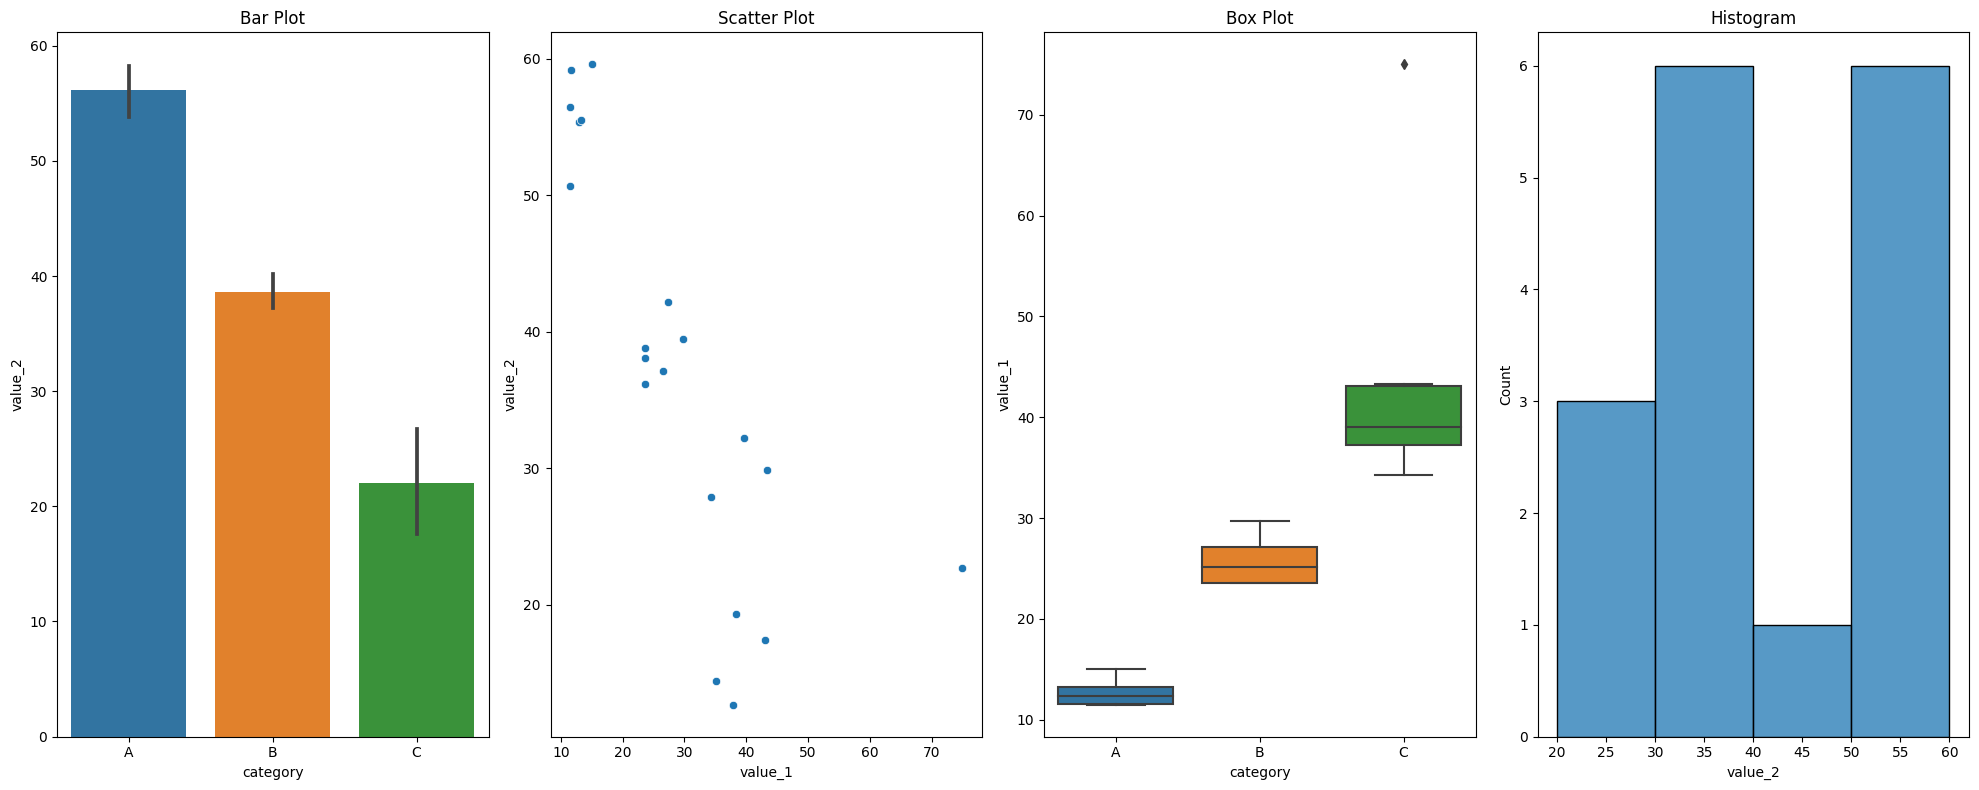

In [34]:
if __name__ == "__main__":
    try:
        '''
        Use the provided file synthetic_data.csv.
        Load this dataset into a DataFrame named df1.
        '''
        df1 = pd.read_csv("/kaggle/input/visualization/synthetic_data.csv")
        #logger.info(f"both dataset loaded successfully..")
    except Exception as e:
        logger.info(f"error in data loading : {e}")
        
    data_visualization_Q1_Q4 = DataVisualization(df1)
    #logger.info(f"dataset exploration :")
    print(f"DataFrame first 5 rows :")
    data_visualization_Q1_Q4.explore_dataset()
    data_visualization_Q1_Q4.bar_plot()
    data_visualization_Q1_Q4.scatter_plot()
    data_visualization_Q1_Q4.box_plot()
    data_visualization_Q1_Q4.show()
    data_visualization_Q1_Q4.histogram()

In [35]:
class DataVisualization:
    
    def __init__(self,dataset:pd.DataFrame) ->None:
        self.dataset = dataset
        self.fig,self.axes = plt.subplots(1,4,figsize=(20,8))
        self.axes = self.axes.flatten()
        
    def explore_dataset(self) ->None:
        print(self.dataset.head())
    
    def show(self)->None:
        plt.tight_layout()
        #plt.show()
        
    def count_plot(self)->None:
        '''Create a count plot using seaborn.countplot for the day column.
        Which day has the highest count?
        (a) Thur
        (b) Fri
        (c) Sat
        (d) Sun '''
        print(sns.countplot(data=self.dataset,x= 'day',ax=self.axes[0]))
        self.axes[0].set_title('Count Plot')
        return None
    def box_plot(self)->None:
        '''Create a box plot for the total_bill column.
        What is the approximate median total_bill (nearest dollar)?'''
        print(sns.boxplot(data=self.dataset,x='total_bill',ax=self.axes[1]))
        median = self.dataset['total_bill'].median()
        print(f"median total_bill (nearest dollar) : {round(median)}")
        self.axes[1].set_title('Box Plot')

    def bar_plot(self)->None:
        '''Create a bar plot showing the average tip for each sex. which group has a higher average tip?
        (a) Male -- Answer
        (b) Female
        (c) Both identical
        (d) Cannot determine'''
        print(sns.barplot(data= self.dataset,x ='sex',y='tip',estimator='mean',ax=self.axes[2]))
        self.axes[2].set_title('Bar Plot')
        
    def scatter_plot(self)->None:
        '''Create a scatter plot of total_bill vs tip, with hue=’time’.
        Which group (Lunch or Dinner) has the point with both highest total_bill and tip?
        (a) Lunch
        (b) Dinner -- Answer
        (c) Both from Lunch
        (d) Highest bill from Dinner, highest tip from Lunch'''
        print(sns.scatterplot(data = self.dataset,x='total_bill',y = 'tip',hue = 'time',ax=self.axes[3]))
        self.axes[3].set_title('Scatter Plot')

DataFrame first 5 rows :
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Axes(0.0233611,0.0484028;0.219264x0.925972)
Axes(0.271486,0.0484028;0.219264x0.925972)
median total_bill (nearest dollar) : 18
Axes(0.519611,0.0484028;0.219264x0.925972)
Axes(0.767736,0.0484028;0.219264x0.925972)


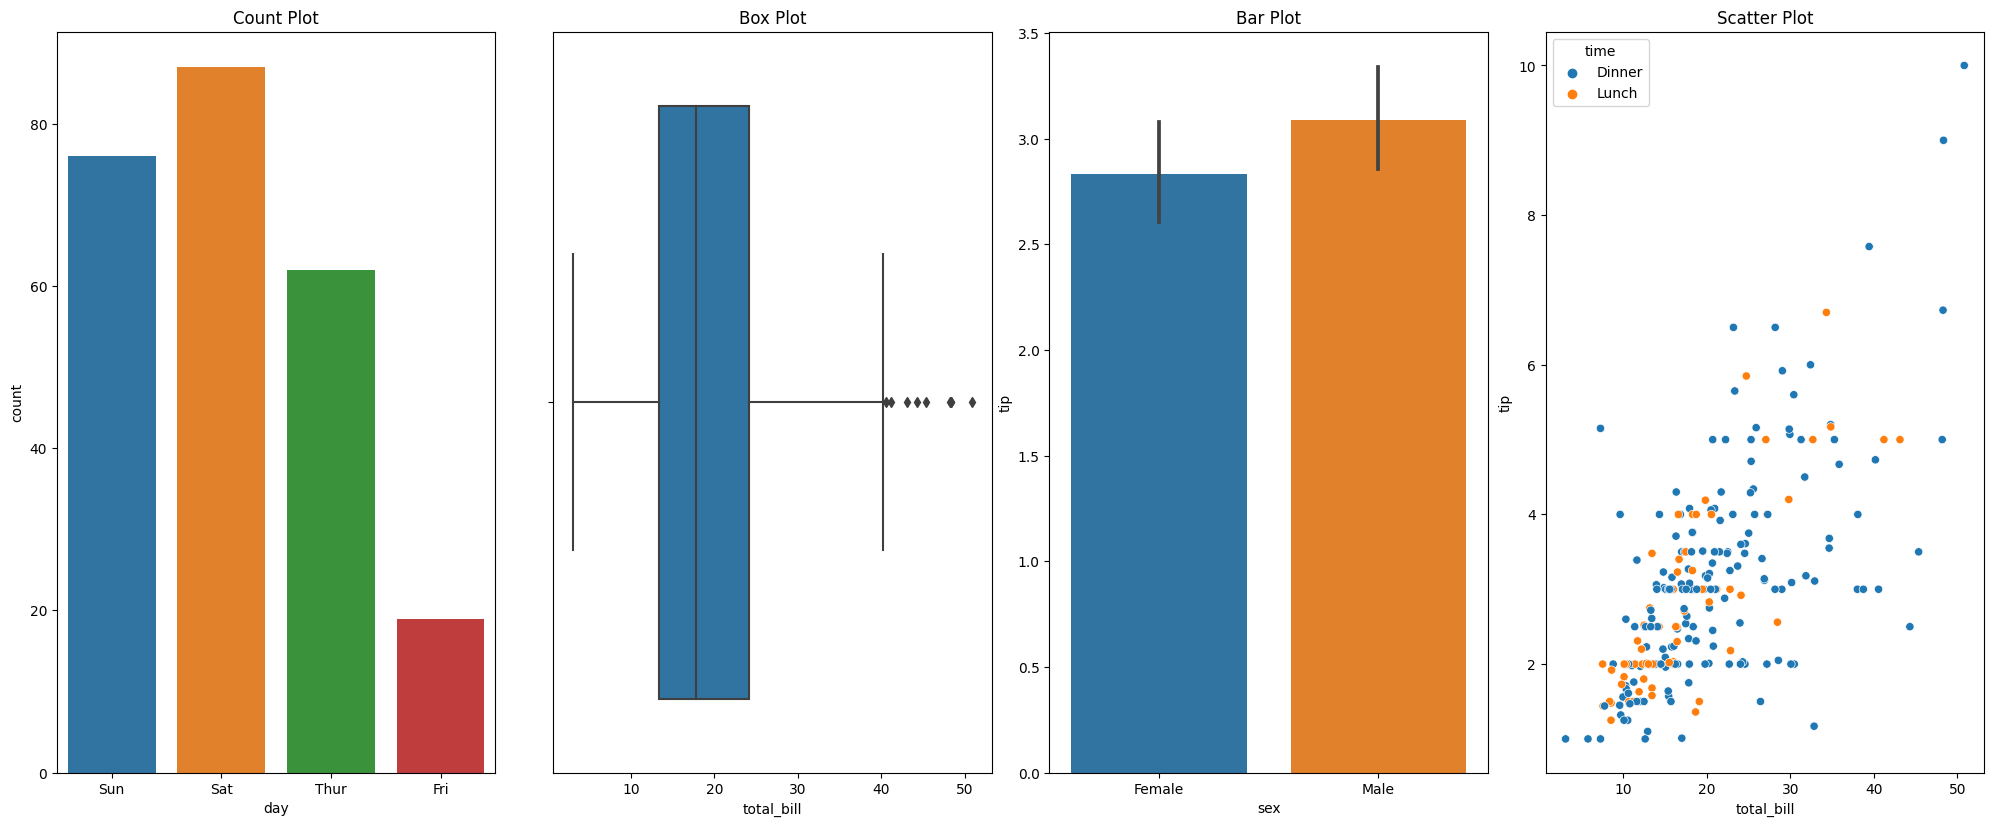

In [36]:
if __name__ == "__main__":
    try:
        '''
        Use the provided file tips.csv.
        Load this dataset into a DataFrame named df2.
        '''
        df2 = pd.read_csv("/kaggle/input/visualization/tips.csv")
        #logger.info(f"both dataset loaded successfully..")
    except Exception as e:
        logger.info(f"error in data loading : {e}")
        
    data_visualization_Q5_Q8 = DataVisualization(df2)
    #logger.info(f"dataset exploration :")
    print(f"DataFrame first 5 rows :")
    data_visualization_Q5_Q8.explore_dataset()
    data_visualization_Q5_Q8.show()
    data_visualization_Q5_Q8.count_plot()
    data_visualization_Q5_Q8.box_plot()
    data_visualization_Q5_Q8.bar_plot()
    data_visualization_Q5_Q8.scatter_plot()

In [37]:
class VisualizationPractise:
    def __init__(self,dataset : pd.DataFrame) ->None:
        self.dataset =  dataset
        self.fig,self.axes = plt.subplots(nrows=1, ncols=4 , figsize = (24,8))
        self.axes= self.axes.flatten()

    def explore_dataset(self) ->None:
        display(self.dataset.head())
    
    def show(self)->None:
        plt.tight_layout()
        #plt.show()
    
    def bar_plot(self) ->None:
        '''
        Create a bar plot using seaborn.barplot that shows the average (mean) value_2
        for each category.
        Based on the plot, what is the approximate average value_2 for category ’A’?
        '''
        sns.barplot(data = self.dataset , x = 'category' , y = 'value_2' , estimator='mean',ax= self.axes[0])
        self.axes[0].set_title('Bar Plot')
    
    def bar_plot_px(self):
        '''
        Create a bar plot using px.bar that shows the average (mean) value_2
        for each category.
        Based on the plot, what is the approximate average value_2 for category ’A’?
        '''
        df_grouped = self.dataset.groupby(['category'])['value_2'].mean().reset_index()
        logger.info(display(df_grouped))
        fig = px.bar(data_frame=df_grouped, x='category', y='value_2',title = 'Bar Plot')
        fig.show()
    
    def scatter_plot(self)->None:
        '''Create a scatter plot using seaborn.scatterplot with value_1 on the x-axis
        and value_2 on the y-axis.
        
        What kind of relationship do value_1 and value_2 appear to have?
        (a) Strong positive correlation
        (b) No clear correlation --> Correct Answer
        (c) Strong negative correlation
        (d) Curved (U-shaped) relationship '''
        sns.scatterplot(data = self.dataset,x= 'value_1',y= 'value_2',ax = self.axes[1])
        self.axes[1].set_title('Scatterplot')

    def scatter_plot_px(self)->None:
        '''Create a scatter plot using px.scatter with value_1 on the x-axis
        and value_2 on the y-axis.
        
        What kind of relationship do value_1 and value_2 appear to have?
        (a) Strong positive correlation
        (b) No clear correlation --> Correct Answer
        (c) Strong negative correlation
        (d) Curved (U-shaped) relationship '''
        fig = px.scatter(data_frame = self.dataset,x= 'value_1',y= 'value_2',title = 'Scatter Plot')
        fig.show()

    def box_plot(self)->None:
        '''Create a box plot using seaborn.boxplot showing value_1 for each category.
        One category shows an outlier beyond the whisker. Which category is it?
        (a) A
        (b) B
        (c) C -->Answer
        (d) None '''
        sns.boxplot(data = self.dataset,x = 'category' , y = 'value_1' , ax = self.axes[2] )
        self.axes[1].set_title('Box Plot')

    def box_plot_px(self)->None:
        '''Create a box plot using px.box showing value_1 for each category.
        One category shows an outlier beyond the whisker. Which category is it?
        (a) A
        (b) B
        (c) C -->Answer
        (d) None '''
        fig = px.box(data_frame = self.dataset , x = 'category' , y= 'value_1' , title = 'Box Plot' )
        fig.show()

In [38]:
#help(px.scatter)

2025-12-13 05:44:24,484 | INFO | root | dataset loaded successfully..
2025-12-13 05:44:24,537 | INFO | root | dataset exploration :


,category,value_1,value_2,size
0,A,13.0,55.4,443
1,A,11.7,59.2,212
2,A,13.3,55.5,370
3,A,15.0,59.6,306
4,A,11.5,56.5,422


2025-12-13 05:44:24,544 | INFO | root | Let's do the visulaization :


,category,value_2
0,A,56.1500
1,B,38.6500
2,C,22.0625


2025-12-13 05:44:24,615 | INFO | root | None


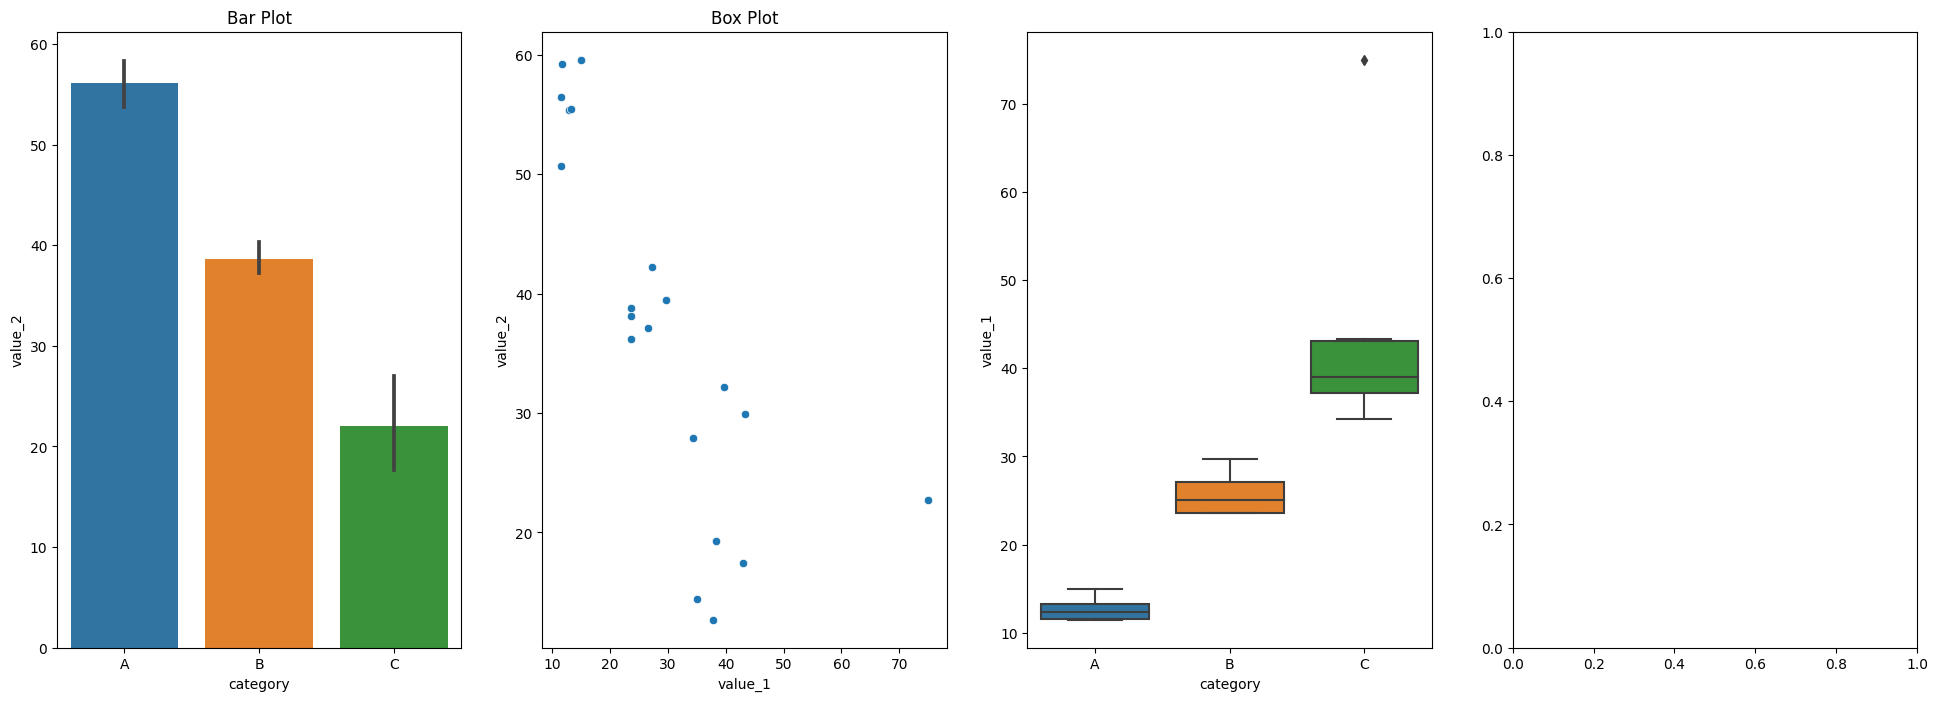

In [39]:
if __name__ == "__main__":
    try: 
        '''
        Use the provided file synthetic_data.csv.
        Load this dataset into a DataFrame named df1.
        '''
        df1 = pd.read_csv("/kaggle/input/visualization/synthetic_data.csv")
        logger.info(f"dataset loaded successfully..")
    except Exception as e:
        logger.info(f"error in data loading : {e}")
        
    visualization_practise = VisualizationPractise(df1)
    logger.info(f"dataset exploration :")
    #print(f"DataFrame first 5 rows : ")
    visualization_practise.explore_dataset()
    logger.info(f"Let's do the visulaization :")
    visualization_practise.bar_plot()
    visualization_practise.bar_plot_px()
    visualization_practise.scatter_plot()
    visualization_practise.scatter_plot_px()
    visualization_practise.box_plot()
    visualization_practise.box_plot_px()

In [40]:
class VisualizationPractise:
    def __init__(self,dataset : pd.DataFrame) ->None:
        self.dataset =  dataset
        self.fig,self.axes = plt.subplots(nrows=1, ncols=4 , figsize = (20,8))
        self.axex = self.axes.flatten()

    def explore_dataset(self) ->None:
        display(self.dataset.head())
    
    def show(self)->None:
        plt.tight_layout()
        #plt.show()
    


2025-12-13 05:44:29,065 | INFO | root | dataset loaded successfully..
2025-12-13 05:44:29,119 | INFO | root | dataset exploration :


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2025-12-13 05:44:29,126 | INFO | root | Let's do the visulaization :


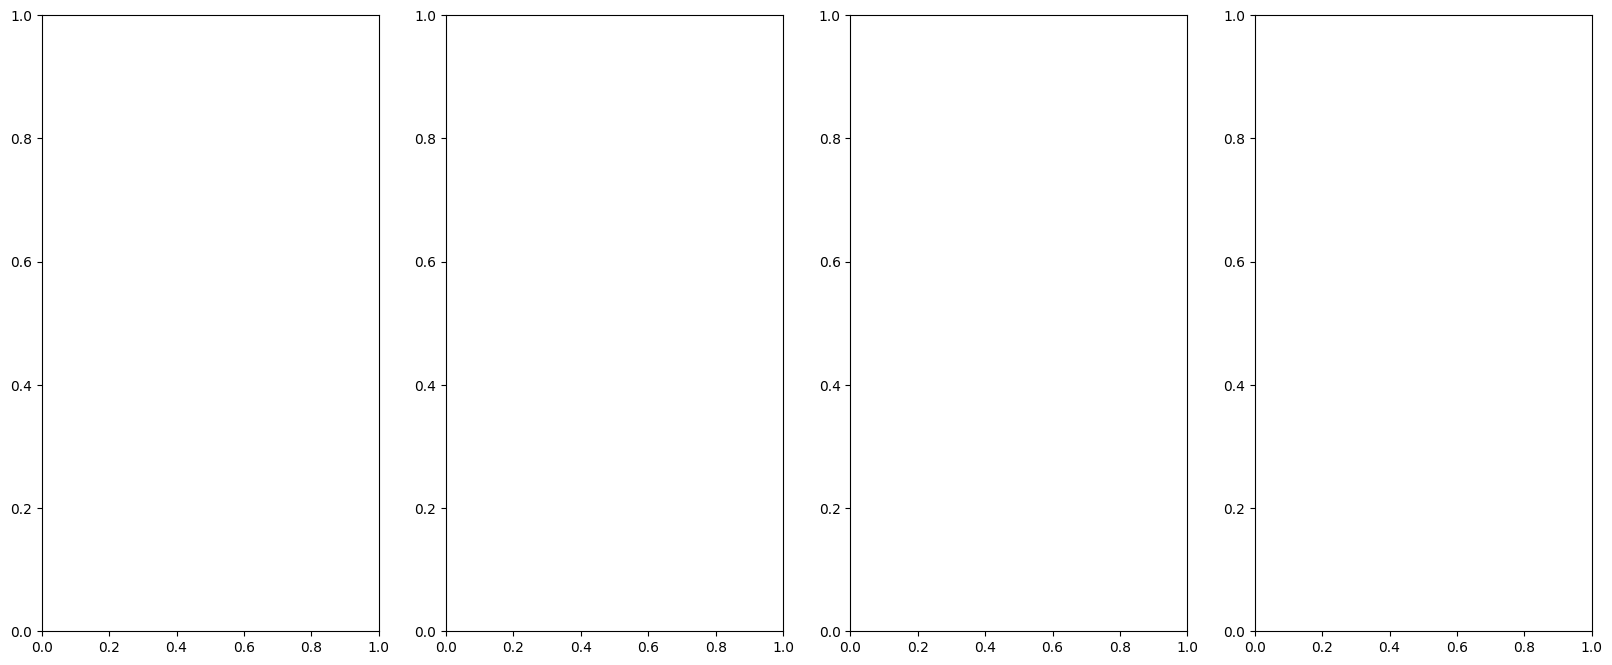

In [41]:
if __name__ == "__main__":
    try:         
        '''
        Use the provided file tips.csv.
        Load this dataset into a DataFrame named df2.
        '''
        df2 = pd.read_csv("/kaggle/input/visualization/tips.csv")
        logger.info(f"dataset loaded successfully..")
    except Exception as e:
        logger.info(f"error in data loading : {e}")
        
    visualization_practise = VisualizationPractise(df2)
    logger.info(f"dataset exploration :")
    #print(f"DataFrame first 5 rows : ")
    visualization_practise.explore_dataset()
    logger.info(f"Let's do the visulaization :")


# Pytest Notes
- `!pytest -q` # this give short test  summary
- `!pytest -v` # gives details summary but will run all pytest file
- `!pytest test_get_pivot_val.py -v` # this is will exactly the file to test
- `%%writefile test_get_pivot_val.py` # this is magic command , this make python file so that we can import
- everything we must after magic command.
- file name and test function  must start with 'test_'

# References 
- https://www.w3schools.com/python/numpy